In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data_nlp_uas.csv')

In [3]:
df

,Comment
0,Komentar komentar buzzeRp seragam
1,Semoga indonesia jangan hanya tinggal nama
2,"Tidak sadarkah diri yg memangku amanah, bahwa ..."
3,Sore ini aku mendapatkan amplop dan nama calon...
4,02🎉
...,...
65524,Inilah kenapa indonesia menjadi bahan tawaan p...
65525,"Misal ini mah ya, kalo emang bener gibran mela..."
65526,Semoga cak nun diberikan kesehatan dan umur pa...
65527,"Fix 02 pakai cara curang, di planning dalam ja..."


In [4]:
# stopwords
with open('stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()
print(type(stopwords))

<class 'list'>


In [5]:
stopwords[4:10]

['kalo', 'amatlah', 'beginian', 'tentang', 'namun', 'memperbuat']

In [6]:
def checkingStopword(text): return True if text in stopwords else False
print(checkingStopword("tidak"))

True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65529 entries, 0 to 65528
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  65529 non-null  object
dtypes: object(1)
memory usage: 512.1+ KB


In [9]:
df["Comment"].isna().sum()

0

In [10]:
def cleansing(text):
    text = re.sub(r'[^\w\s-]', ' ', text)
    text = text.encode('ascii','ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

In [11]:
checkingStopword("tidak")

True

In [12]:
data1 = df.copy()

In [13]:
data2 = df.copy()

In [14]:
data1['cleaned'] = data1['Comment'].apply(cleansing)

In [15]:
stopwords.remove('tidak')

In [16]:
checkingStopword("tidak")

False

In [17]:
data2['cleaned'] = data2['Comment'].apply(cleansing)

In [18]:
def replaceNan(df, column):
    df[column] = df[column].replace('', np.nan)
    return df

data1 = replaceNan(data1, 'cleaned')
data2 = replaceNan(data2, 'cleaned')

In [19]:
data1.dropna(inplace=True)
data2.dropna(inplace=True)

In [20]:
data2 = data2.reset_index(drop=True)
data1 = data1.reset_index(drop=True)

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64455 entries, 0 to 64454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  64455 non-null  object
 1   cleaned  64455 non-null  object
dtypes: object(2)
memory usage: 1007.2+ KB


In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64452 entries, 0 to 64451
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  64452 non-null  object
 1   cleaned  64452 non-null  object
dtypes: object(2)
memory usage: 1007.2+ KB


In [ ]:
data2

In [32]:
data1.isna().sum()

Comment    0
cleaned    0
dtype: int64

In [36]:
data1.Comment.isna().sum()

0

In [37]:
data1["tokenized"] = data1["cleaned"].apply(word_tokenize)

In [38]:
data2["tokenized"] = data2["cleaned"].apply(word_tokenize)

In [40]:
kamus = 'https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv'
dicts = pd.read_csv(kamus)

In [41]:
def normalize_text(tokens):
    slang_to_formal = dict(zip(dicts['slang'], dicts['formal']))
    normalized_tokens = [slang_to_formal.get(token, token) for token in tokens]
    return normalized_tokens

In [42]:
data1["normalized"] = data1["tokenized"].apply(normalize_text)
data2["normalized"] = data2["tokenized"].apply(normalize_text)

In [43]:
data1["normalized"] = data1["normalized"].apply(lambda x: ' '.join(x))
data2["normalized"] = data2["normalized"].apply(lambda x: ' '.join(x))

In [50]:
data2.isna().sum()

Comment       0
cleaned       0
tokenized     0
normalized    0
dtype: int64

In [51]:
data2

,Comment,cleaned,tokenized,normalized
0,Komentar komentar buzzeRp seragam,komentar komentar buzzerp seragam,"[komentar, komentar, buzzerp, seragam]",komentar komentar buzzerp seragam
1,Semoga indonesia jangan hanya tinggal nama,semoga indonesia tinggal nama,"[semoga, indonesia, tinggal, nama]",semoga indonesia tinggal nama
2,"Tidak sadarkah diri yg memangku amanah, bahwa ...",tidak sadarkah memangku amanah langkah gerak g...,"[tidak, sadarkah, memangku, amanah, langkah, g...",tidak sadarkah memangku amanah langkah gerak g...
3,Sore ini aku mendapatkan amplop dan nama calon...,sore amplop nama calonnya lakukan,"[sore, amplop, nama, calonnya, lakukan]",sore amplop nama calonnya lakukan
4,02🎉,02,[02],02
...,...,...,...,...
64450,Inilah kenapa indonesia menjadi bahan tawaan p...,indonesia bahan tawaan pejabat2 negeri sungguh...,"[indonesia, bahan, tawaan, pejabat2, negeri, s...",indonesia bahan tawaan pejabat2 negeri sungguh...
64451,"Misal ini mah ya, kalo emang bener gibran mela...",mah emang bener gibran melanggar etik melangga...,"[mah, emang, bener, gibran, melanggar, etik, m...",mah memang benar gibran melanggar etik melangg...
64452,Semoga cak nun diberikan kesehatan dan umur pa...,semoga cak nun kesehatan umur membimbing memba...,"[semoga, cak, nun, kesehatan, umur, membimbing...",semoga cak nun kesehatan umur membimbing memba...
64453,"Fix 02 pakai cara curang, di planning dalam ja...",fix 02 pakai curang planning jangka liciknya r...,"[fix, 02, pakai, curang, planning, jangka, lic...",fix 02 pakai curang planning jangka liciknya r...


In [55]:
def plot_ngram(df, column, n=1, top_n=20):
    komentar = ' '.join(df[column].astype(str).str.lower())
    # kata = re.findall(r'\b\w+\b', komentar)\
    kata = komentar.split()
    ngrams_list = list(ngrams(kata, n))
    ngram_freq = Counter(ngrams_list)
    ngram_freq_df = pd.DataFrame(list(ngram_freq.items()), columns=['Ngram', 'Frekuensi'])
    ngram_freq_df = ngram_freq_df.sort_values(by='Frekuensi', ascending=False)
    top_ngrams = ngram_freq_df.head(top_n)
    top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,7))
    sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")
    plt.xlabel('Jumlah kemunculan', fontsize=15)
    plt.ylabel('Ngram', fontsize=15)
    plt.title(f'{top_n} {n}-gram yang paling sering muncul dalam komentar', fontsize=20)
    plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")


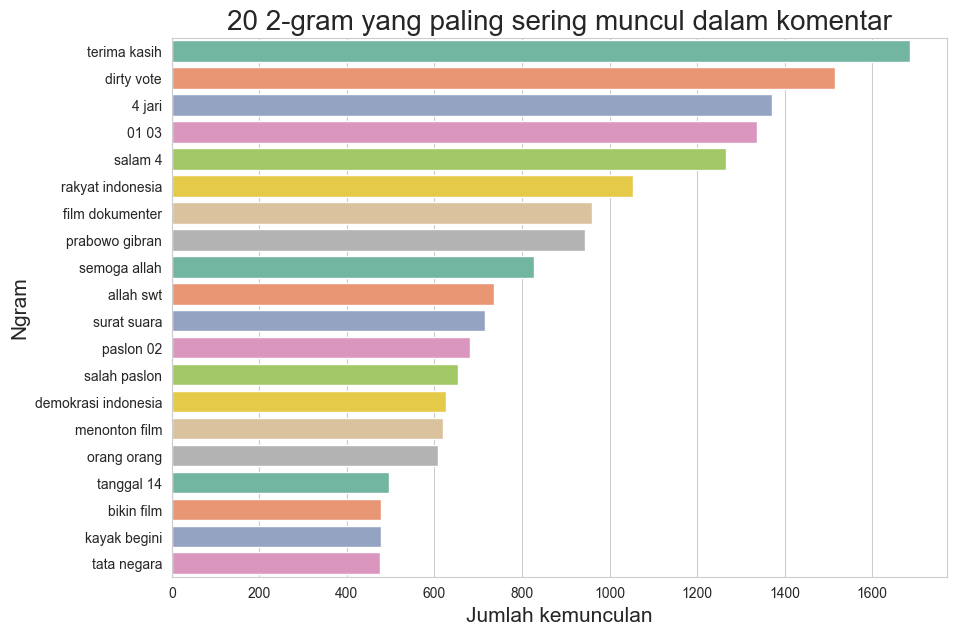

C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")


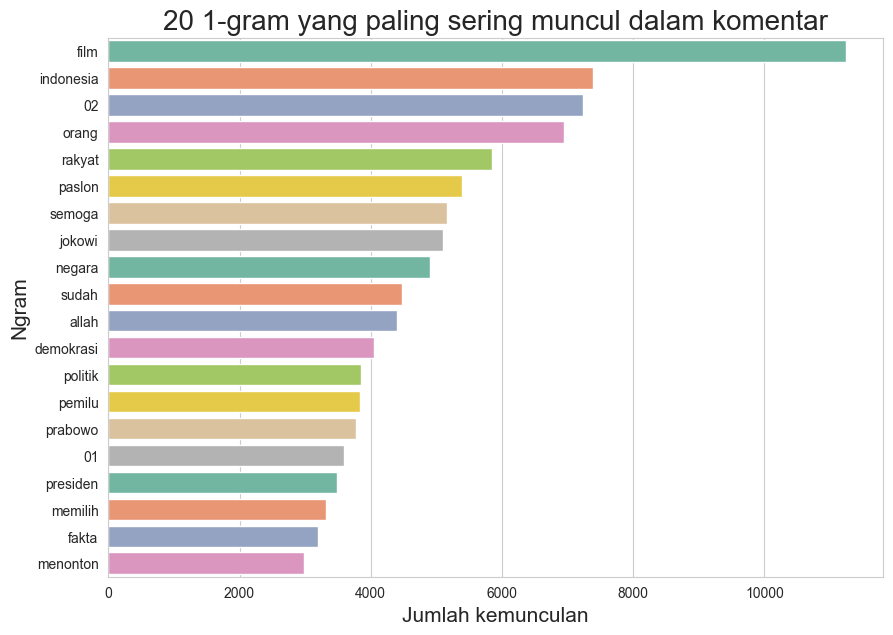

In [56]:
plot_ngram(data1, 'normalized', n=2, top_n=20)
plot_ngram(data1, 'normalized', n=1, top_n=20)

C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")


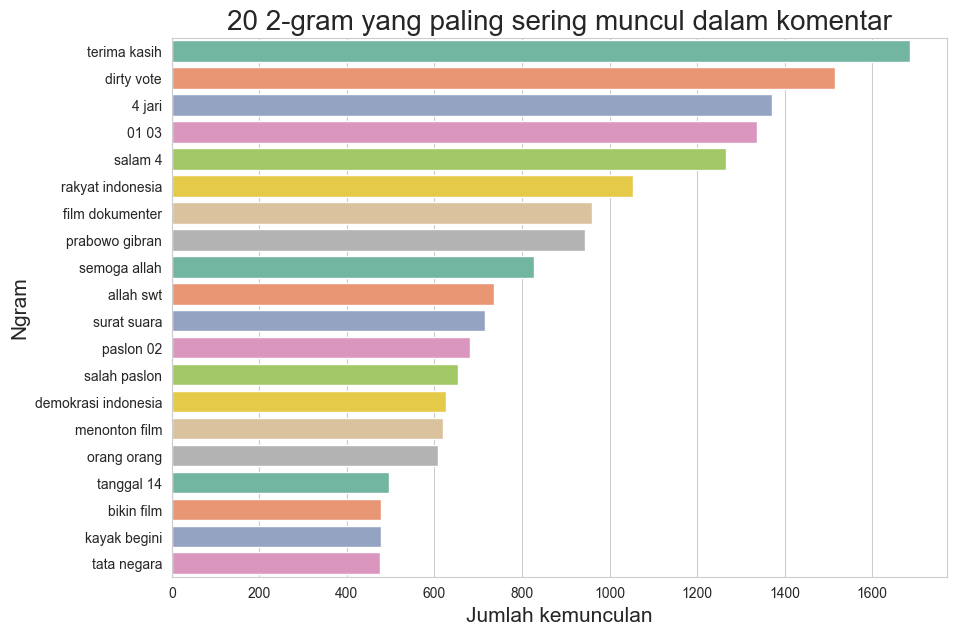

C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_14308\3939954863.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")


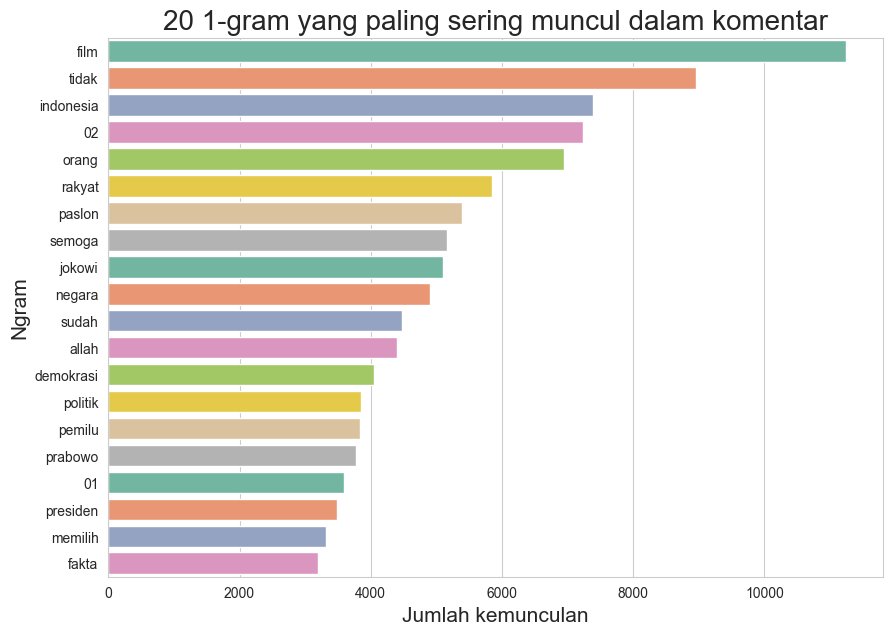

In [57]:
plot_ngram(data2, 'normalized', n=2, top_n=20)
plot_ngram(data2, 'normalized', n=1, top_n=20)

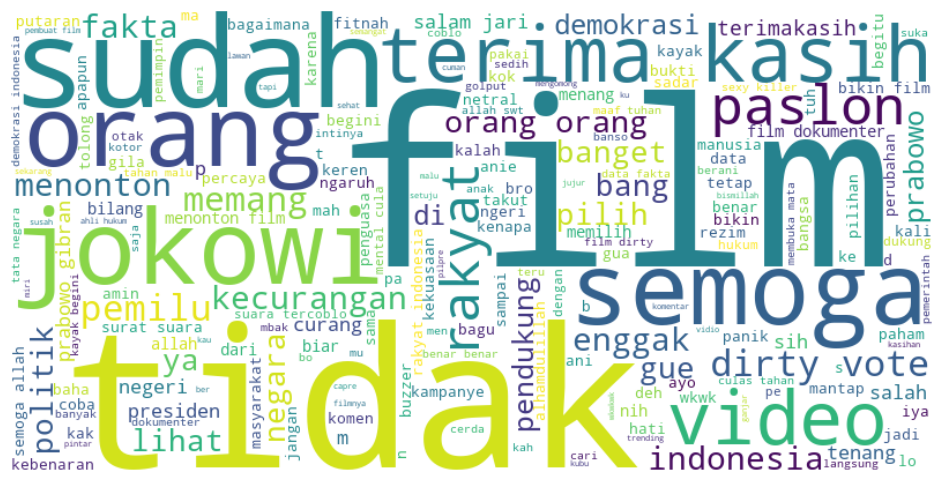

In [60]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(data2['normalized'].to_string())
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

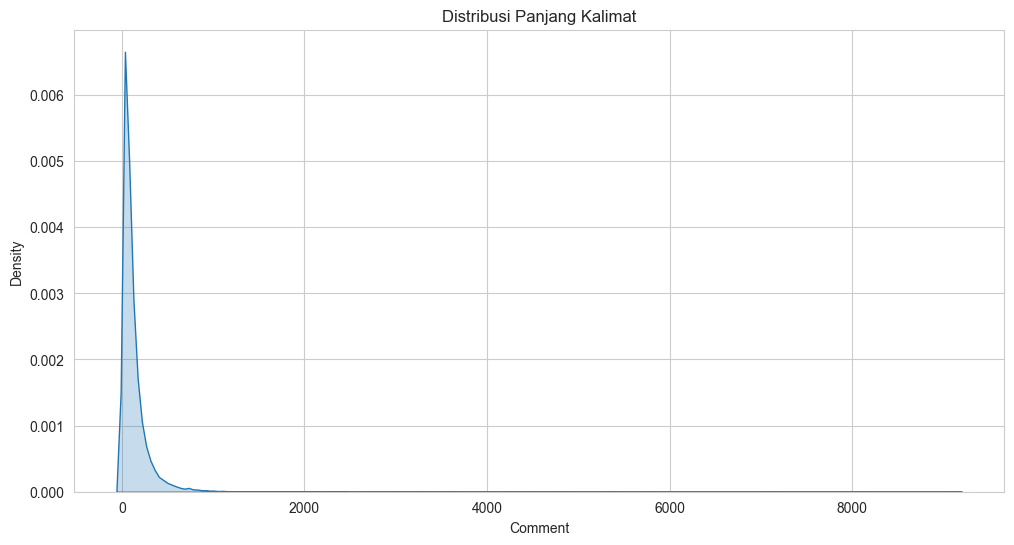

In [61]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x=df["Comment"].str.len(), fill=True)
plt.title("Distribusi Panjang Kalimat")
plt.show()

In [62]:
data1.to_csv("hapus_tidak_prepocess.csv", index=False)
data2.to_csv("keep_tidak_prepocess.csv", index=False)

In [63]:
pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

In [64]:
import torch

In [65]:
sentiment_analysis = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,
    config={"max_seq_len": 512},
)

label_index = {"LABEL_0": "positive", "LABEL_1": "neutral", "LABEL_2": "negative"}

In [66]:
for i in data2.index:
    if i in data2.index:
        text = data2.loc[i, "normalized"]
        if len(text.split()) > 512:
            text = " ".join(text.split()[:512])
        result = sentiment_analysis(text[:512])
        data2.loc[i, "sentiment"] = label_index[result[0]["label"]]
        data2.loc[i, "score"] = result[0]["score"]

In [67]:
data2.head()

,Comment,cleaned,tokenized,normalized,sentiment,score
0,Komentar komentar buzzeRp seragam,komentar komentar buzzerp seragam,"[komentar, komentar, buzzerp, seragam]",komentar komentar buzzerp seragam,neutral,0.993686
1,Semoga indonesia jangan hanya tinggal nama,semoga indonesia tinggal nama,"[semoga, indonesia, tinggal, nama]",semoga indonesia tinggal nama,positive,0.599724
2,"Tidak sadarkah diri yg memangku amanah, bahwa ...",tidak sadarkah memangku amanah langkah gerak g...,"[tidak, sadarkah, memangku, amanah, langkah, g...",tidak sadarkah memangku amanah langkah gerak g...,negative,0.985638
3,Sore ini aku mendapatkan amplop dan nama calon...,sore amplop nama calonnya lakukan,"[sore, amplop, nama, calonnya, lakukan]",sore amplop nama calonnya lakukan,neutral,0.997550
4,02🎉,02,[02],02,neutral,0.498101


In [69]:
data2.to_csv("sentiment_analysis_data2.csv", index=False)

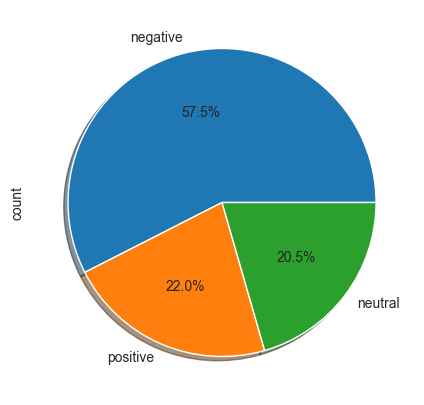

In [70]:
# plot sentiment distribution pie chart

data2["sentiment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5, 5))
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_14308\2558889038.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_14308\2558889038.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")


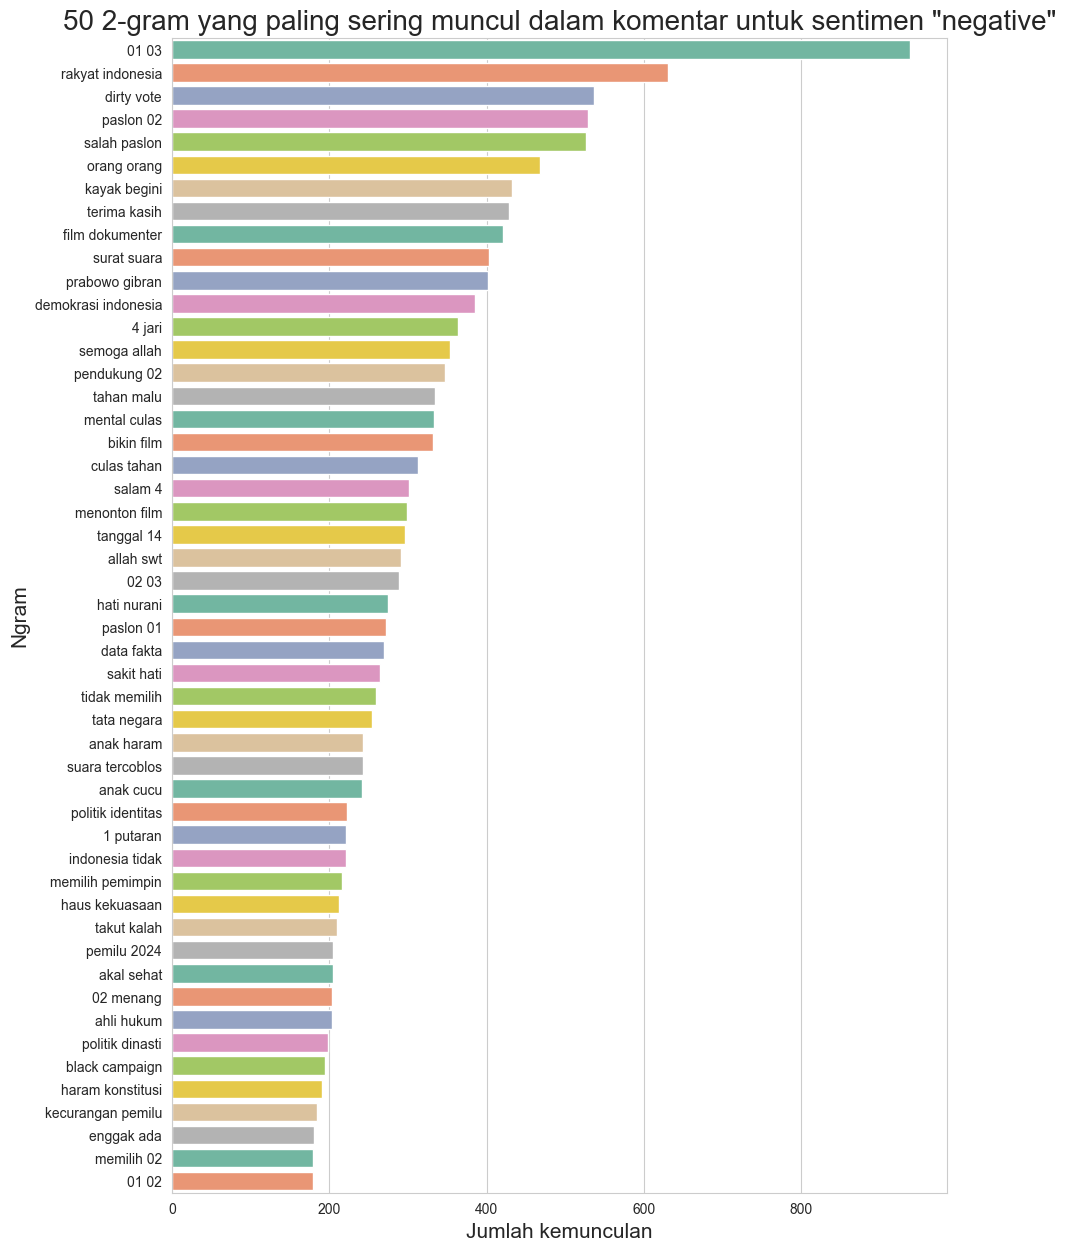

In [86]:
import pandas as pd
import re
from collections import Counter
from nltk.util import ngrams
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ngram(df, text_column, sentiment_column, sentiment_value, n=1, top_n=20):
    filtered_df = df[df[sentiment_column] == sentiment_value]
    komentar = ' '.join(filtered_df[text_column].astype(str).str.lower())
    # kata = re.findall(r'\b\w+\b', komentar)
    kata = komentar.split()
    ngrams_list = list(ngrams(kata, n))
    ngram_freq = Counter(ngrams_list)
    ngram_freq_df = pd.DataFrame(list(ngram_freq.items()), columns=['Ngram', 'Frekuensi'])
    ngram_freq_df = ngram_freq_df.sort_values(by='Frekuensi', ascending=False)
    top_ngrams = ngram_freq_df.head(top_n)
    top_ngrams['Ngram'] = top_ngrams['Ngram'].apply(lambda x: ' '.join(x))
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 15))
    sns.barplot(x='Frekuensi', y='Ngram', data=top_ngrams, palette="Set2")
    plt.xlabel('Jumlah kemunculan', fontsize=15)
    plt.ylabel('Ngram', fontsize=15)
    plt.title(f'{top_n} {n}-gram yang paling sering muncul dalam komentar untuk sentimen "{sentiment_value}"', fontsize=20)
    plt.show()

# Contoh penggunaan:
plot_ngram(data2, 'normalized', 'sentiment', 'negative', n=2, top_n=50)

In [73]:
data2["sentiment"].value_counts()

sentiment
negative    37059
positive    14158
neutral     13238
Name: count, dtype: int64

In [89]:
# mengambil 10000 data positive secara acak pada semua sentiment value
positive = data2[data2["sentiment"] == "positive"].sample(n=12000, random_state=42)
negative = data2[data2["sentiment"] == "negative"].sample(n=12000, random_state=42)
neutral = data2[data2["sentiment"] == "neutral"].sample(n=12000, random_state=42)

In [90]:
data = pd.concat([positive, negative, neutral], ignore_index=True)

In [91]:
data.reset_index(drop=True, inplace=True)

In [92]:
data

,Comment,cleaned,tokenized,normalized,sentiment,score
0,Terima kasih sudah mencerdaskan bangsa dengan ...,terima kasih mencerdaskan bangsa data fakta,"[terima, kasih, mencerdaskan, bangsa, data, fa...",terima kasih mencerdaskan bangsa data fakta,positive,0.953096
1,Iya bener,iya bener,"[iya, bener]",iya benar,positive,0.778663
2,Emng boleh seoercaya itu,emng seoercaya,"[emng, seoercaya]",memang seoercaya,positive,0.991190
3,Ga ada bagusnya...🙉...yg di wawancara ga berkelas,bagusnya wawancara berkelas,"[bagusnya, wawancara, berkelas]",bagusnya wawancara berkelas,positive,0.993296
4,Denger gibahan ini mah.. ngga banget.. fokus a...,denger gibahan mah ngga banget fokus memperbai...,"[denger, gibahan, mah, ngga, banget, fokus, me...",dengar gibahan mah enggak banget fokus memperb...,positive,0.729036
...,...,...,...,...,...,...
35995,Tadinya saya dan kluarga ingin memilih 02 karn...,kluarga memilih 02 beliau presiden tpi stelah ...,"[kluarga, memilih, 02, beliau, presiden, tpi, ...",keluarga memilih 02 beliau presiden tapi setel...,neutral,0.516222
35996,Pembahasan nya tentang pemihakan Jokowi terhad...,pembahasan pemihakan jokowi paslon 02 trus wak...,"[pembahasan, pemihakan, jokowi, paslon, 02, tr...",pembahasan pemihakan jokowi paslon 02 terus wa...,neutral,0.993591
35997,@@istyiztea jubirnya bopak castelo😁,istyiztea jubirnya bopak castelo,"[istyiztea, jubirnya, bopak, castelo]",istyiztea jubirnya bopak castelo,neutral,0.991380
35998,02 : all in,02,[02],02,neutral,0.498101


<Axes: ylabel='count'>

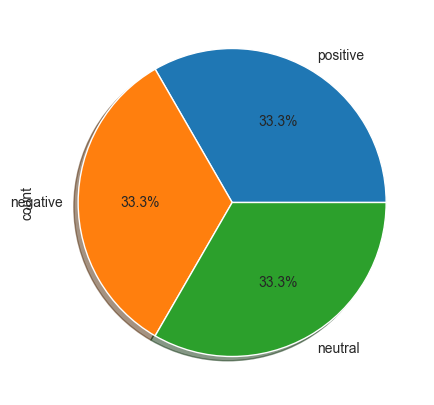

In [93]:
data["sentiment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5, 5))

In [94]:
# data to csv
data.to_csv("sentiment_analysis_data_seimbang.csv", index=False)